<a href="https://colab.research.google.com/github/averkief/My_Date_Analytics/blob/main/Popular_Russian_syllables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Предисловие***<br>
Когда мой сын подрастал и начинал познавать мир, то дошло дело и до чтения.
Современные методики рекомендуют учить детей не буквам, а слогам. Указывая на то, что так будет проще научиться читать.<br>
И так в русском языке 10 гласных букв и 20 согласных. Отбросив соединения согласных с гласными которые не соответсвуют правилам русского языка, получаем 158 правильных слогов.<br>
И тут у меня возник вопрос, а какие слоги самые популярные, какие лучше выучить первыми???<br><br>
ИТАК ЗАДАЧА: Какой слог встречается чаще всего? И бонусом, какая длина чаще всего у этих слов?

**Последовательность действий**<br>
*Этап 1: Находжение источника*<br>
Выбор книги выпал на "Война и Мир" Л.Н.Толстова, как самая большая по объему. Текст книги есть в интернете. Требуется спарсить текст с сайта<br>
*Этап 2: Обработка сырых данных* <br>
Разбиваем текст на слова и извлекаем пунктуацию, предлоги, местоимения слова не относящиеся к словам со слогами<br>
*Этап 3: Внесение данных для нахождения слогов* <br>
Подготовка искомых слогов и счетчиков подсчета<br>
*Этап 4: Обработка полезных данных* <br>
Обрабатываем каждое слово<br>
*Этап 5: Вывод* <br>
Получение информации: количественное значиени, графики<br>

**С какими затруднениями пришлось столкнуться**<br>
**Загвозка 1:** Изучив код источника, обнаружили, что есть дублирующиеся ссылки, как например "ТОМ ПЕРВЫЙ", "Часть первая", "I" имеют одну сслыку. Если дубли чистить методом set (множеством), то теряется порядок страниц, и их невозможно потом отсортировать, так как порядок идет по возрастанию левых симолов, таких как 1, 10, 100. Т.е. вторая страница будет только после всех сотых.<br>
*Решение:* Дополнить проверкой функции которая сравнивает с предидущим индексом.<br>

**Загвозка 2:** Находить индекс первого уровня списка по значению хранящимся во втором уровне давольно затруднительно. Для учета частоты слогов. <br> 
*Решение:* Перевел список в DataFrame. <br> 
**Загвозка 3:** По доп.задачке возникли трудности с добавлением данных в строку в новых колонках<br>
*Решение:*Вернулся к списку, а формирование DF будет в конце когда духуровевый список будет готов. Нужно решить загвозку №2<br>
**Загвозка 4:** Загвозку №2 решил. Но возникла проблема со списком, когда идет учет длины в котором находился слог, записывал в отдельный индекс. Колонок получилось очень много, не дождался конца обработки.<br>
*Решение:* Решил вернуться к формированию DataFrame по слогам. Найдем самое длинное слово и добавим столько количества колонок дополнительно. В каждой колонке будет увеличивать значение, при нахождении этого слога в слове соответсвующей длины.<br>
**Загвозка 5:** Отображение гистограмы по слогам. Масштаб не позволяет сделать каждый слог отдельным стобликом.<br>
*Решение:* Предварительно вывести DF и отобразить графики в другом BI.<br>
**Загвозка 6:**<br>
*Решение:*<br>
**Загвозка 7:**<br>
*Решение:*<br>
**Загвозка 8:**<br>
*Решение:*<br>
**Загвозка 9:**<br>
*Решение:*<br>

### Подключение библиотек и глобальных переменных

In [1]:
import requests # Бибилиотека запросов к web-сервисам
from bs4 import BeautifulSoup as bs # Библиотека парсинга web-страниц
import pandas as pd # Библиотека для работы с таблицами
import numpy as np

# Для обработки текста
import nltk # Библиотека для работы с текстом
from nltk.tokenize import word_tokenize # токенайзер - разбивает непрерывный текст на токены(слова). word_tokenize - для разделения слов на токены.
#nltk.download('all')
nltk.download('punkt')
#nltk.download('stopwords')

import string # используем для получения знаков пунктуации

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Глобальные переменные
URL = 'https://ilibrary.ru' # + index.html - Страница оглавления книг "Война и Мир"
URL_CHAPTER  = '/text/11/index.html' # страница оглавления
URL_ENDINGS = [] # Список url страниц книги
TEXT_BOOK = '' # Обработанный текст для анализа слогов в виде списка

### Этап 1: Находжение источника

In [3]:
# Подключение к странице оглавления
connect_url = requests.get(URL + URL_CHAPTER)
if connect_url.status_code == 200:
  text_on_page = connect_url.text
else:
  print('СТРАНИЦА НЕ ДОСТУПНА')

In [4]:
# Функция проверка существующей ссылки
def check_href(href_url):
  ''' Проверка значение с пердидущим значением списка'''
  global URL_ENDINGS

  if len(URL_ENDINGS) < 1:
    URL_ENDINGS.append(href_url)
  else:
    if href_url != URL_ENDINGS[-1]:
      URL_ENDINGS.append(href_url)

In [5]:
# Получение всех страниц книги
chapter_page = bs(text_on_page, 'html.parser')
href_to_url = chapter_page.find_all('p')
for href_one in href_to_url:
  check_href(href_one.a['href'])

# Проверка количества страниц в списке, должно быть 361
print(len(URL_ENDINGS))

361


### Этап 2: Обработка сырых данных

In [6]:
# Списки пунктуации и стоп-слов (предлоги, местоимения и т.п.)
my_stop_punct = list(string.punctuation)
my_stop_punct = set(my_stop_punct + ['—'] + ['..'] + ['...'] + ['«'] + ['»'])
my_stop_words = {'и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 
                 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'ее', 'мне', 'от', 'меня', 
                 'еще', 'нет', 'о', 'из', 'ему', 'ну', 'ли', 'уже', 'или', 'ни', 'него', 'до', 'вас', 'нибудь', 
                 'уж', 'вам', 'там', 'ей', 'они', 'тут', 'где', 'есть', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 
                 'сам', 'чтоб', 'без', 'будто', 'чего', 'тоже', 'себе', 'под', 'ж', 'кто', 'этот', 'того', 
                 'потому', 'этого', 'какой', 'ним', 'этом', 'мой', 'тем', 'чтобы', 'нее', 'куда', 'зачем', 
                 'всех', 'при', 'об', 'хоть', 'после', 'над', 'тот', 'эти', 'нас', 'про', 'них', 'какая', 
                 'разве', 'эту', 'моя', 'свою', 'этой', 'чуть', 'том', 'такой', 'им', 'более', 'всю', 'это', 
                 'нами', 'раз', 'abc', 'abcdefghiklmnopqrstuvwxyz', '123456789102030405060708090100110120130140150160',
                 'был', 'была', 'было'}

In [7]:
# Функция обработки текста
def text_processing(text, punkt, swort):
  ''' Принимает сырой текст, фильтрует его от знаков пунктуации, стоп-слов и переводит в нижний регистр'''
  
  words = word_tokenize(text.lower()) # Разбмваем на список слов (токены)
  words = [word for word in words if word not in punkt] # Удаляем знаки пунктуации
  words = [word for word in words if word not in swort] # Удаляем стопслова

  all_words = ' '.join(words)
  return all_words

In [8]:
%%time
# Получение текта книги с каждой страницы
for URL_ENDING in URL_ENDINGS:
  print(URL + URL_ENDING)
  connect_url_page = requests.get(URL + URL_ENDING)
  if connect_url_page.status_code == 200:
    text_page = connect_url_page.text

    one_page = bs(text_page, 'html.parser')
    text_in_url = one_page.find_all('span', class_='p')
    for text_one in text_in_url:
      TEXT_BOOK = TEXT_BOOK + text_processing(text_one.text, my_stop_punct, my_stop_words) + ' ' # Текст в функцию передается построчно до красной строки
      
  
  else:
    print('ALARM!!!STOP')


https://ilibrary.ru/text/11/p.1/index.html
https://ilibrary.ru/text/11/p.2/index.html
https://ilibrary.ru/text/11/p.3/index.html
https://ilibrary.ru/text/11/p.4/index.html
https://ilibrary.ru/text/11/p.5/index.html
https://ilibrary.ru/text/11/p.6/index.html
https://ilibrary.ru/text/11/p.7/index.html
https://ilibrary.ru/text/11/p.8/index.html
https://ilibrary.ru/text/11/p.9/index.html
https://ilibrary.ru/text/11/p.10/index.html
https://ilibrary.ru/text/11/p.11/index.html
https://ilibrary.ru/text/11/p.12/index.html
https://ilibrary.ru/text/11/p.13/index.html
https://ilibrary.ru/text/11/p.14/index.html
https://ilibrary.ru/text/11/p.15/index.html
https://ilibrary.ru/text/11/p.16/index.html
https://ilibrary.ru/text/11/p.17/index.html
https://ilibrary.ru/text/11/p.18/index.html
https://ilibrary.ru/text/11/p.19/index.html
https://ilibrary.ru/text/11/p.20/index.html
https://ilibrary.ru/text/11/p.21/index.html
https://ilibrary.ru/text/11/p.22/index.html
https://ilibrary.ru/text/11/p.23/index.ht

In [9]:
list_TEXT_BOOK = TEXT_BOOK.split(' ')

In [10]:
quantity_words = len(list_TEXT_BOOK) # Сколько всего обрабатывается слов
quantity_words

300768

In [11]:
#Определить самое длинное слово
max_word = max(list_TEXT_BOOK, key=len)
max_len_word = len(max_word)
print(f'Самое длинное слово: {max_word}, состоит из: {max_len_word} букв')

Самое длинное слово: сверхъестественно-прекрасное, состоит из: 28 букв


###ТЕСТИРОВАНИЕ ВЫБОРКИ СЛОВ НАЧАТЬ ОТ СЮДА, ЧТОБ НЕ ГРУЗИТЬ ВСЕ ВРЕМЯ С САЙТА

In [ ]:
#TEXT_BOOK_SRT = "лев толстой eh bien mon prince gênes et lucques ne sont plus que des apanages des поместья de la famille buonaparte non je vous préviens que si vous ne me dites pas que nous avons la guerre si vous vous permettez encore de pallier toutes les infamies toutes les atrocités de cet antichrist ma parole j y crois je ne vous connais plus vous n'êtes plus mon ami vous n'êtes plus верный раб comme vous dites 1. здравствуйте здравствуйте je vois que je vous fais peur 2 садитесь рассказывайте говорила июле 1805 года известная анна павловна шерер фрейлина приближенная императрицы марии феодоровны встречая важного чиновного князя василия первого приехавшего вечер анна павловна кашляла несколько дней был грипп говорила грипп был тогда новое слово употреблявшееся только редкими записочках разосланных утром красным лакеем было написано различия « si vous n'avez rien de mieux à faire monsieur le comte mon prince et si la perspective de passer la soirée chez une pauvre malade ne vous effraye pas trop je serai charmée de vous voir chez moi entre 7 et 10 heures annette scherer » 3 dieu quelle virulente sortie 4 отвечал нисколько смутясь такою встречей вошедший князь придворном шитом мундире чулках башмаках звездах светлым выражением плоского лица говорил изысканном французском языке котором только говорили думали наши деды теми тихими покровительственными интонациями которые свойственны состаревшемуся свете дворе значительному человеку подошел анне павловне поцеловал руку подставив надушенную сияющую лысину покойно уселся диване avant tout dites-moi comment vous allez chère amie 5 успокойте сказал изменяя голоса тоном котором из-за приличия участия просвечивало равнодушие даже насмешка можно быть здоровой когда нравственно страдаешь можно имея чувство оставаться спокойною наше время сказала анна павловна весь вечер надеюсь праздник английского посланника нынче середа надо показаться сказал князь дочь заедет мной повезет думала нынешний праздник отменен je vous avoue que toutes ces fêtes et tous ces feux d'artifice commencent à devenir insipides 6 ежели знали хотите праздник отменили сказал князь привычке заведенные часы говоря вещи которым хотел верили ne me tourmentez pas eh bien qu a-t-on décidé par rapport à la dépêche de novosilzoff vous savez tout 7 сказать сказал князь холодным скучающим тоном qu a-t-on décidé on a décidé que buonaparte a brûlé ses vaisseaux et je crois que nous sommes en train de brûler les nôtres 8 князь василий говорил всегда лениво актер говорит роль старой пиесы анна павловна шерер напротив несмотря свои сорок лет была преисполнена оживления порывов быть энтузиасткой сделалось общественным положением иногда когда даже хотелось обмануть ожиданий людей знавших делалась энтузиасткой сдержанная улыбка игравшая постоянно лице анны павловны хотя шла отжившим чертам выражала избалованных детей постоянное сознание своего милого недостатка которого хочет может находит нужным исправляться середине разговора политические действия анна павловна разгорячилась ах говорите австрию ничего понимаю может быть австрия никогда хотела хочет войны предает россия одна должна быть спасительницей европы наш благодетель знает свое высокое призвание будет верен вот одно верю нашему доброму чудному государю предстоит величайшая роль мире добродетелен хорош бог оставит исполнит свое призвание задавить гидру революции которая теперь ужаснее лице убийцы злодея одни должны искупить кровь праведника кого нам надеяться спрашиваю англия своим коммерческим духом поймет может понять высоту души императора александра отказалась очистить мальту хочет видеть ищет заднюю мысль наших действий сказали новосильцеву ничего поняли могли понять самоотвержения нашего императора который ничего хочет себя хочет блага мира обещали ничего обещали будет пруссия объявила бонапарте непобедим вся европа ничего может против верю одном слове гарденбергу гаугвицу cette fameuse neutralité prussienne ce n'est qu'un piège 9. верю одного бога высокую судьбу нашего милого императора спасет европу вдруг остановилась улыбкой насмешки своею горячностью думаю сказал князь улыбаясь ежели послали вместо нашего милого винценгероде взяли приступом согласие прусского короля красноречивы дадите чаю сейчас a propos прибавила опять успокоиваясь нынче два очень интересные человека le vicomte de mortemart il est allié aux montmorency par les rohans 10 одна лучших фамилий франции один хороших эмигрантов настоящих потом l'abbé morio 11 знаете глубокий ум был принят государем знаете очень рад буду сказал князь скажите прибавил только вспомнив что-то особенно-небрежно тогда спрашивал было главной целью посещения правда l'impératrice-mère 12 желает назначения барона функе первым секретарем вену c'est un pauvre sire ce baron à ce qu'il paraît 13 князь"
#TEXT_BOOK_SRT = "одна лучших фамилий франции глубокий ум был принят государем знаете очень рад буду сказал князь скажите прибавил только вспомнив тогда спрашивал было главной доме своего отца. Хотя он и предполагал, что история его уже известна в Москве и что дамы, окружающие его отца, всегда недоброжелательные к нему, воспользуются этим случаем, чтобы раздражить графа, он все-таки в день приезда пошел на половину отца. Войдя в гостиную, обычное местопребывание княжон, он поздоровался с дамами, сидевшими за пяльцами и за книгой, которую вслух читала одна из них. Их было три. Старшая, чистоплотная, с длинною талией, строгая девица, та самая, которая выходила к Анне Михайловне, читала; младшие, обе румяные и хорошенькие, отличавшиеся друг от друга только тем, что у одной была родинка над губой, очень красившая ее, шили в пяльцах. Пьер был встречен, как мертвец или зачумленный. Старшая княжна прервала чтение и молча посмотрела на него испуганными глазами; младшая, без родинки, приняла точно такое же выражение; самая меньшая, с родинкой, веселого и смешливого характера, нагнулась к пяльцам, чтобы скрыть улыбку, вызванную, вероятно, предстоящей сценой, забавность которой она предвидела. Она протянула вниз шерстинку и нагнулась, будто разбирая узоры и едва удерживаясь от смеха. В то время как Борис вошел к нему, Пьер ходил по своей комнате, изредка останавливаясь в углах, делая угрожающие жесты к стене, как будто пронзая невидимого врага шпагой, и строго взглядывая сверх очков и затем вновь начиная свою прогулку, проговаривая неясные слова, пожимая плечами и разводя руками. — L'Angleterre a vécu 3, — проговорил он нахмуриваясь и указывая на кого-то пальцем. — Monsieur Pitt comme traître à la nation et au droit des gens est condamné à... 4 — Он не успел договорить приговора Питту, воображая себя в эту минуту самим Наполеоном и вместе с своим героем уже совершив опасный переезд через Па-де-Кале и завоевав Лондон, — как увидел входившего к нему молодого, стройного и красивого офицера. Он остановился. Пьер оставил Бориса четырнадцатилетним мальчиком и решительно не помнил его; но, несмотря на то, с свойственною ему быстрою и радушною манерой взял его за руку и дружелюбно улыбнулся."

###Этап 3: Внесение данных для нахождения слогов

In [12]:
vowels = 'ауоыиэяюёе' # гласные буквы
consonants = 'бвгджзклмнпрстфхцчшщ' # согласные буквы
TOTAL_SLOG = [] # будем создавать список с вложеным списком слогов, для подсчета совпадений и длин слов

In [13]:
# Получим возможные слоги
for consonant in consonants:
  for vowel in vowels:
    TOTAL_SLOG.append([consonant + vowel])

In [14]:
for quantity_slog in range(len(TOTAL_SLOG)):
  TOTAL_SLOG[quantity_slog].append(0) # Дополняем список нулевыми значениями совпадений слогов

In [15]:
df_slog = pd.DataFrame(TOTAL_SLOG, columns=['Слог', 'Частота']) # Сформируем предварительный датафрейм, 1 - слог, 2 - количество совпадений

In [16]:
#Добавляем колонки справа столько сколько возможно максимальное слово, т.е. от 2 до 28. Заполняем их 0, чтоб потом вести счетчик подсчета
for num in range(2, max_len_word + 1):
  df_slog[f'{num} букв(ы)'] = 0

In [17]:
df_slog.head()

,Слог,Частота,2 букв(ы),3 букв(ы),4 букв(ы),5 букв(ы),6 букв(ы),7 букв(ы),8 букв(ы),9 букв(ы),...,19 букв(ы),20 букв(ы),21 букв(ы),22 букв(ы),23 букв(ы),24 букв(ы),25 букв(ы),26 букв(ы),27 букв(ы),28 букв(ы)
0,ба,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,бу,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,бо,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,бы,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,би,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Этап 4: Обработка полезных данных

In [20]:
def word_processing(word_word):
  ''' Функция поиска слогов в слове'''

  global vowels, consonants, TOTAL_SLOG
  len_word = len(word_word)
  
  for index_letter in range(1, len_word):
    if word_word[index_letter] in vowels and word_word[index_letter - 1] in consonants:
      slog = word_word[index_letter - 1] + word_word[index_letter]
            
      find_index = df_slog.loc[df_slog.isin([slog]).any(axis=1)].index.tolist() # нахождение индекса в дата фрейме (номера строки) слога
      #print('Слог: ' + slog + ' / Индекс в списке логов: ' + str(find_index)) # проверка правильности индекса слога
      #df_slog[1][find_index] += 1
      df_slog['Частота'][find_index[0]] += 1 # Увеличиваем число находжение слога в колонке частоты совпадений

      df_slog[f'{len_word} букв(ы)'][find_index[0]] += 1 # Увеличиваем число находжение слога в колонке длины слова где находится слог
      

In [21]:
%%time
for word_from_book in TEXT_BOOK.split(' '):
  word_processing(word_from_book)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


CPU times: user 19min 37s, sys: 21.9 s, total: 19min 59s
Wall time: 19min 25s


###Этап 5: Вывод

In [22]:
df_slog.shape

(200, 29)

In [23]:
df_slog.head()

,Слог,Частота,2 букв(ы),3 букв(ы),4 букв(ы),5 букв(ы),6 букв(ы),7 букв(ы),8 букв(ы),9 букв(ы),...,19 букв(ы),20 букв(ы),21 букв(ы),22 букв(ы),23 букв(ы),24 букв(ы),25 букв(ы),26 букв(ы),27 букв(ы),28 букв(ы)
0,ба,2613,2,109,158,225,361,499,595,346,...,2,4,0,0,0,0,0,0,0,0
1,бу,2288,1,18,155,690,281,187,106,181,...,1,1,0,1,1,0,0,0,0,0
2,бо,5462,2,207,343,929,1021,1073,566,392,...,3,4,2,1,0,1,0,0,0,0
3,бы,3384,0,3,1796,117,668,385,165,36,...,0,0,0,0,0,0,0,1,0,0
4,би,1947,0,17,101,261,312,484,394,182,...,1,0,1,1,0,0,0,0,0,0


In [24]:
df_slog['Частота'].max() # показать самые частовстречающиеся слоги
#fig = h.get_figure()

21896

In [25]:
df_slog_tolk = df_slog.loc[df_slog['Частота'] != 0] # отфильтруем ДатаФрей убрав слоги которые не встречаются
df_slog_tolk.shape

(160, 29)

In [26]:
df_slog_tolk.head()

,Слог,Частота,2 букв(ы),3 букв(ы),4 букв(ы),5 букв(ы),6 букв(ы),7 букв(ы),8 букв(ы),9 букв(ы),...,19 букв(ы),20 букв(ы),21 букв(ы),22 букв(ы),23 букв(ы),24 букв(ы),25 букв(ы),26 букв(ы),27 букв(ы),28 букв(ы)
0,ба,2613,2,109,158,225,361,499,595,346,...,2,4,0,0,0,0,0,0,0,0
1,бу,2288,1,18,155,690,281,187,106,181,...,1,1,0,1,1,0,0,0,0,0
2,бо,5462,2,207,343,929,1021,1073,566,392,...,3,4,2,1,0,1,0,0,0,0
3,бы,3384,0,3,1796,117,668,385,165,36,...,0,0,0,0,0,0,0,1,0,0
4,би,1947,0,17,101,261,312,484,394,182,...,1,0,1,1,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34951b8f10>]],
      dtype=object)

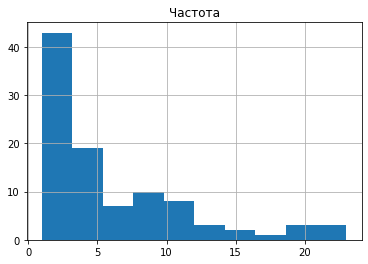

In [ ]:
df_slog_tolk.hist(column="Частота") # Построение гистограммы

In [27]:
df_slog.to_csv('slog.csv')
df_slog_tolk.to_csv('slog_tolk.csv')

***ЧЕРНОВИК***